# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# load traffic sign names
import pandas as pd

names = pd.read_csv('signnames.csv')

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np
from numpy import unique

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_train_classes = len(unique(y_train))
n_valid_classes = len(unique(y_valid))
n_test_classes = len(unique(y_test))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of train classes =", n_train_classes)
print("Number of validation classes =", n_valid_classes)
print("Number of test classes =", n_test_classes)

n_classes = n_train_classes

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of train classes = 43
Number of validation classes = 43
Number of test classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import random
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})

# auxiliary function
def remove_axes(fig):
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

Visualize sample images of each class in training, validation and test sets

                 Train                                   Validation                                     Test


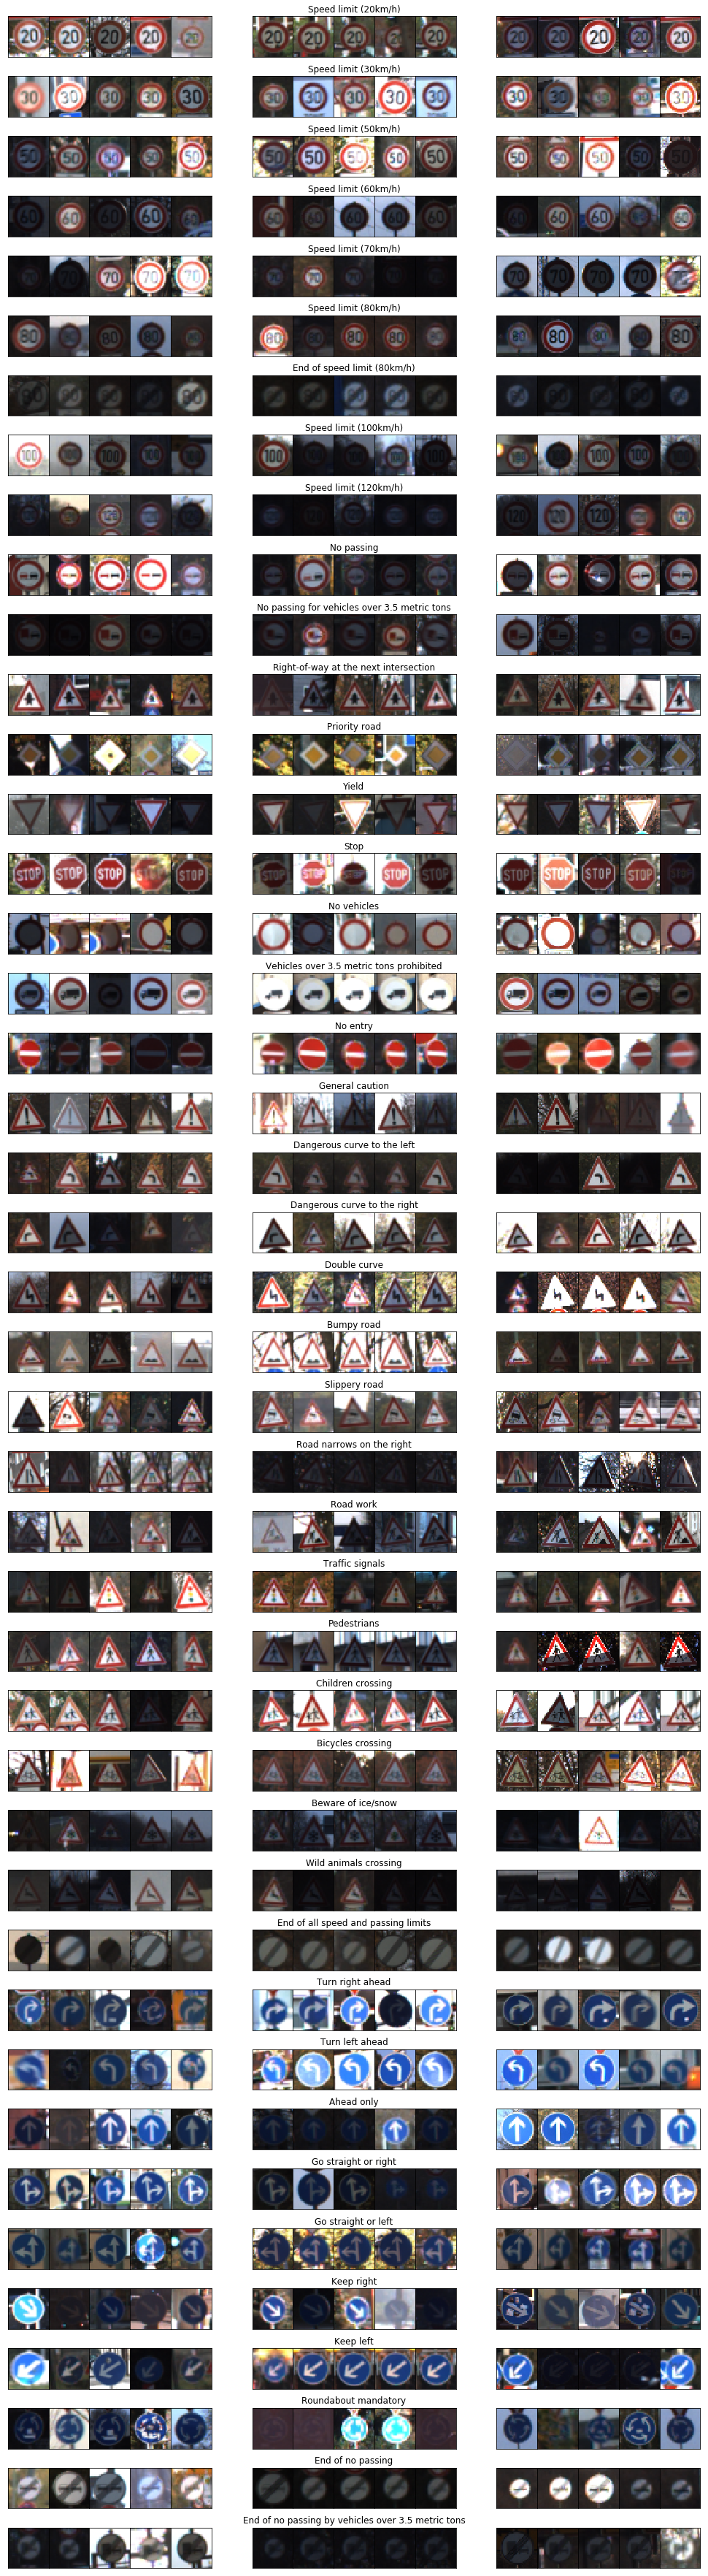

In [5]:
print("                 Train                                   Validation                                     Test")
fig = plt.figure(figsize=(17,n_classes*1.5))
fig.subplots_adjust(wspace=0) 

def show_data(fig,x,y,id,start,end,title=""):
    ind_all = np.where(y == id)[0]
    ind = random.sample(list(ind_all), 5)
    for i in range(start,end):
        plt.subplot(n_classes, 17, id*17+i+1)
        if i == 9:
           fig.axes.set_title(name.SignName) 
        fig = plt.imshow(x[ind[i-start],:,:,:])
        remove_axes(fig)

for name in names.itertuples():
    show_data(fig, X_train, y_train, name.ClassId, 0, 5)
    show_data(fig, X_valid, y_valid, name.ClassId, 6, 11, name.SignName)
    show_data(fig, X_test, y_test, name.ClassId, 12, 17)

Visualize distribution of classes in training, validation and test sets.

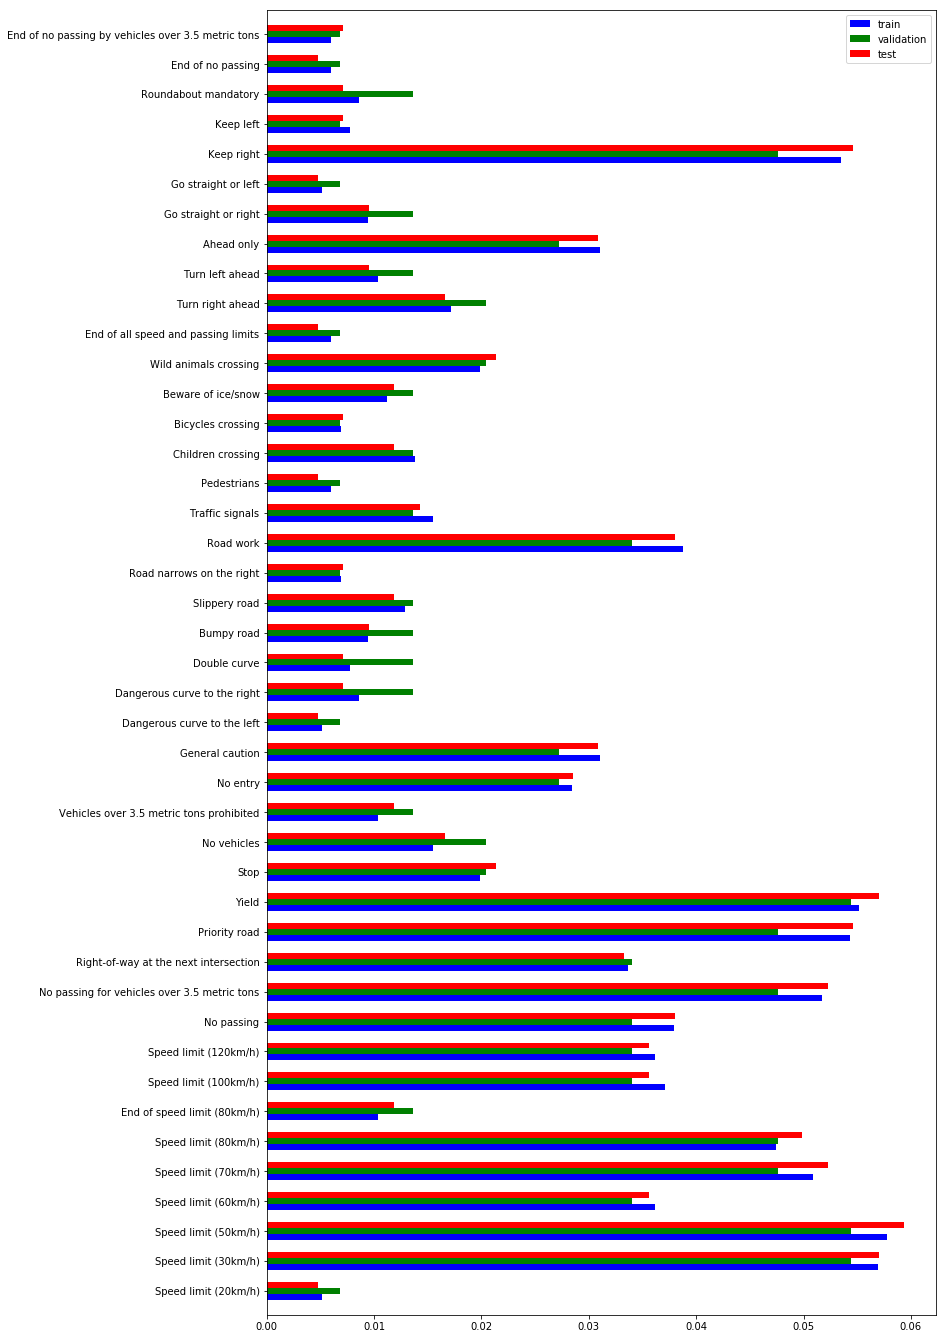

In [6]:
hist_train = np.histogram(y_train,bins=range(n_classes+1))[0] / n_train
hist_valid = np.histogram(y_valid,bins=range(n_classes+1))[0] / n_validation
hist_test = np.histogram(y_test,bins=range(n_classes+1))[0] / n_test

ind = np.arange(n_classes)
width = 0.2
fig, ax = plt.subplots(figsize=(12, 24))
ax.barh(ind, hist_train, width, color='blue', label='train')
ax.barh(ind + width, hist_valid, width, color='green', label='validation')
ax.barh(ind + 2*width, hist_test, width, color='red', label='test')

ax.set(yticks=ind + width, yticklabels=names['SignName'], ylim=[2*width - 1, n_classes])
ax.legend()

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# translare images
import random
import cv2
import math
import bisect

cols = 32
rows = 32

Functions for transforming an image

In [8]:
# auxiliary function for generic transformation with a given matrix M
def transform(x, M):
    transformed = np.zeros_like(x)
    for i in range(0,3):
        transformed[:,:,i] = cv2.warpAffine(x[:,:,i],M,(cols,rows))

    return transformed

# translation of an image
def translate(x):
    x_shift = random.choice([-3,-2,-1,1,2,3])
    y_shift = random.choice([-3,-2,-1,1,2,3])
    M = np.float32([[1,0,x_shift],[0,1,y_shift]])

    return transform(x,M)

# shear transformation of an image
def shear(x):
    x_shear = random.uniform(-0.3,0.3)
    y_shear = random.uniform(-0.3,0.3)
    M = np.float32([[1,x_shear,0],[y_shear,1,0]])

    return transform(x,M)

# rotation of an image
def rotate(x):
    angle = random.uniform(-5,5)/180*3.1415
    cos = math.cos(angle)
    sin = math.sin(angle)
    M = np.float32([[cos,-sin,0],[sin,cos,0]])

    return transform(x,M)

# scaling of an image
def scale(x):
    new_cols = int(random.uniform(0.9,1.1) * cols)
    new_rows = int(random.uniform(0.9,1.1) * rows)
    new_image = cv2.resize(x,(new_cols, new_rows))

    return cv2.getRectSubPix(new_image, (cols,rows), (new_cols//2,new_rows//2))

# contrast normalization using difference of Gaussians
def contrast_normalization(x):
    yuv=cv2.cvtColor(x,cv2.COLOR_BGR2YUV)
    blur1 = cv2.GaussianBlur(yuv[:,:,0],(3, 3), 0)
    blur2 = cv2.GaussianBlur(yuv[:,:,0],(5, 5), 0)
    yuv[:,:,0] = blur2 - blur1

    return cv2.cvtColor(yuv,cv2.COLOR_YUV2BGR)

# histogram equalization
def equalize_hist(x):
    yuv=cv2.cvtColor(x,cv2.COLOR_BGR2YUV)
    yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0])

    return cv2.cvtColor(yuv,cv2.COLOR_YUV2BGR)

# adaptive histogram equalization
def adaptive_equalize_hist(x):
    yuv=cv2.cvtColor(x,cv2.COLOR_BGR2YUV)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(6,6))
    yuv[:,:,0] = clahe.apply(yuv[:,:,0])

    return cv2.cvtColor(yuv,cv2.COLOR_YUV2BGR)

# image adjustment
# based on the code from https://stackoverflow.com/questions/39767612/what-is-the-equivalent-of-matlabs-imadjust-in-python
def imadjust(x, tol=1, vin=[0,255], vout=(0,255)):
    # src : input one-layer image (numpy array)
    # tol : tolerance, from 0 to 100.
    # vin  : src image bounds
    # vout : dst image bounds
    # return : output img

    yuv = cv2.cvtColor(x,cv2.COLOR_BGR2YUV)
    src = yuv[:,:,0]

    tol = max(0, min(100, tol))

    if tol > 0:
        # Compute in and out limits
        # Histogram
        hist = np.histogram(src,bins=list(range(257)))[0]

        # Cumulative histogram
        cum = hist.copy()
        for i in range(1, 256):
            cum[i] = cum[i - 1] + hist[i]

        # Compute bounds
        total = src.shape[0] * src.shape[1]
        low_bound = total * tol / 100
        upp_bound = total * (100 - tol) / 100
        vin[0] = bisect.bisect_left(cum, low_bound)
        vin[1] = bisect.bisect_left(cum, upp_bound)
        
     # Stretching
    scale = (vout[1] - vout[0]) / (vin[1] - vin[0])
    vs = src-vin[0]
    vs[src<vin[0]]=0
    vd = vs*scale+0.5 + vout[0]
    vd[vd>vout[1]] = vout[1]
    yuv[:,:,0] = vd

    return cv2.cvtColor(yuv,cv2.COLOR_YUV2BGR)

show the effect of contrast normalization pipeline

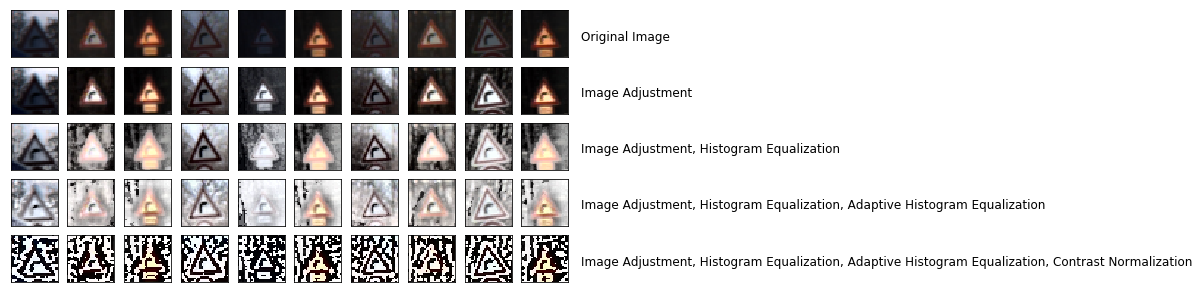

In [9]:
import matplotlib.image as mpimg

    
fig = plt.figure(figsize=(10,5))

ind_all = np.where(y_train == 20)[0]
image_ids = random.sample(list(ind_all), 10)

for i in range(len(image_ids)):
    plt.subplot(5, 10, i+1)
    fig = plt.imshow(X_train[image_ids[i],:,:,:])
    remove_axes(fig)
    plt.subplot(5, 10, 10+i+1)
    fig = plt.imshow(imadjust(X_train[image_ids[i],:,:,:]))
    remove_axes(fig)
    plt.subplot(5, 10, 20+i+1)
    fig = plt.imshow(equalize_hist(imadjust(X_train[image_ids[i],:,:,:])))
    remove_axes(fig)
    plt.subplot(5, 10, 30+i+1)
    fig = plt.imshow(adaptive_equalize_hist(equalize_hist(imadjust(X_train[image_ids[i],:,:,:]))))
    remove_axes(fig)
    plt.subplot(5, 10, 40+i+1)
    fig = plt.imshow(contrast_normalization(adaptive_equalize_hist(equalize_hist(imadjust(X_train[image_ids[i],:,:,:])))))
    remove_axes(fig)

plt.subplot(5,10,10)
plt.text(40, 20, "Original Image", fontsize=12)
plt.subplot(5,10,20)
plt.text(40, 20, "Image Adjustment", fontsize=12)
plt.subplot(5,10,30)
plt.text(40, 20, "Image Adjustment, Histogram Equalization", fontsize=12)
plt.subplot(5,10,40)
plt.text(40, 20, "Image Adjustment, Histogram Equalization, Adaptive Histogram Equalization", fontsize=12)
plt.subplot(5,10,50)
plt.text(40, 20, "Image Adjustment, Histogram Equalization, Adaptive Histogram Equalization, Contrast Normalization", fontsize=12)

show examples of transformed images

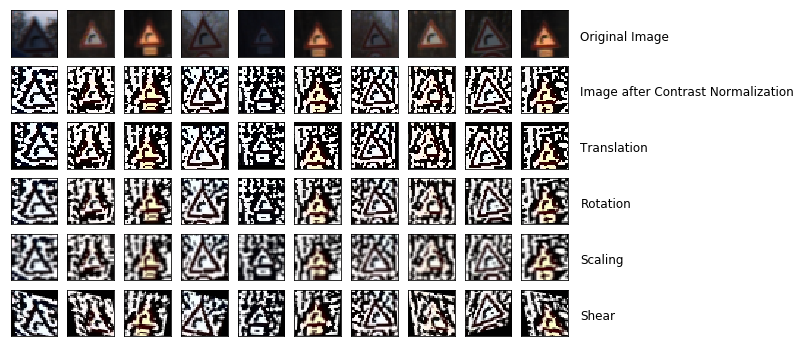

In [10]:
fig = plt.figure(figsize=(10,6))

for i in range(len(image_ids)):
    plt.subplot(6, 10, i+1)
    fig = plt.imshow(X_train[image_ids[i],:,:,:])
    remove_axes(fig)
    image = contrast_normalization(adaptive_equalize_hist(equalize_hist(imadjust(X_train[image_ids[i],:,:,:]))))
    plt.subplot(6, 10, 10+i+1)
    fig = plt.imshow(image)
    remove_axes(fig)
    plt.subplot(6, 10, 20+i+1)
    fig = plt.imshow(translate(image))
    remove_axes(fig)
    plt.subplot(6, 10, 30+i+1)
    fig = plt.imshow(rotate(image))
    remove_axes(fig)
    plt.subplot(6, 10, 40+i+1)
    fig = plt.imshow(scale(image))
    remove_axes(fig)
    plt.subplot(6, 10, 50+i+1)
    fig = plt.imshow(shear(image))
    remove_axes(fig)

plt.subplot(6,10,10)
plt.text(40, 20, "Original Image", fontsize=12)
plt.subplot(6,10,20)
plt.text(40, 20, "Image after Contrast Normalization", fontsize=12)
plt.subplot(6,10,30)
plt.text(40, 20, "Translation", fontsize=12)
plt.subplot(6,10,40)
plt.text(40, 20, "Rotation", fontsize=12)
plt.subplot(6,10,50)
plt.text(40, 20, "Scaling", fontsize=12)
plt.subplot(6,10,60)
plt.text(40, 20, "Shear", fontsize=12)

normalize training, validation, test sets,  create augmented training set

In [8]:
# contrast normalization pipeline
def normalization_pipeline(X):
    X_norm = np.zeros_like(X)
    for i in range(0,X.shape[0]):
        X_norm[i,:,:,:] = contrast_normalization(adaptive_equalize_hist(equalize_hist(imadjust(X[i,:,:,:]))))
 
    return X_norm

# apply contrast normalization pipeline to training, validation and test sets
X_train_norm = normalization_pipeline(X_train)
X_valid_norm = normalization_pipeline(X_valid)
X_test_norm = normalization_pipeline(X_test)

# augment training set with translate, shear, scale and rotate transforms
X_train_shifted = np.zeros_like(X_train_norm)
X_train_sheared = np.zeros_like(X_train_norm)
X_train_rotated = np.zeros_like(X_train_norm)
X_train_scaled = np.zeros_like(X_train_norm)
for i in range(0,X_train_norm.shape[0]):
    X_train_shifted[i,:,:,:] = translate(X_train_norm[i,:,:,:])
    X_train_sheared[i,:,:,:] = shear(X_train_norm[i,:,:,:])
    X_train_rotated[i,:,:,:] = rotate(X_train_norm[i,:,:,:])
    X_train_scaled[i,:,:,:] = scale(X_train_norm[i,:,:,:])

X_train_norm = np.concatenate((X_train_norm,X_train_shifted,X_train_sheared,X_train_rotated,X_train_scaled),axis=0)
y_train = np.concatenate((y_train,y_train,y_train,y_train,y_train),axis=0)

In [9]:
print("Number of training examples after augmentation =", len(y_train))

Number of training examples after augmentation = 173995


hyperparameters of training process

In [10]:
BATCH_SIZE = 128
EPOCHS = 1000       # maximal number of epoch
rate = 0.001        # learning rate 
reg_rate = 0.001    # regularization constant
no_improvement = 20 # maximal number of iterations without no improvement in validation accuracy

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten

# auxuliary function for defining convolution layer
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return x

# auxiliary function for defining max pooling
def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')


definition of parameters of convolutional neural network

In [12]:
# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

weights = {
    'conv0': tf.Variable(tf.truncated_normal([1, 1, 3, 12], mu, sigma)),
    'conv1': tf.Variable(tf.truncated_normal([5, 5, 12, 24], mu, sigma)),
    'conv2': tf.Variable(tf.truncated_normal([5, 5, 24, 64], mu, sigma)),
    'fc1': tf.Variable(tf.truncated_normal([1600, 120], mu, sigma)),
    'fc2': tf.Variable(tf.truncated_normal([120, 84], mu, sigma)),
    'out': tf.Variable(tf.truncated_normal([84, n_classes], mu, sigma))
}

biases = {
    'bconv0': tf.Variable(tf.zeros([12])),              
    'bconv1': tf.Variable(tf.zeros([24])),              
    'bconv2': tf.Variable(tf.zeros([64])),                
    'bfc1': tf.Variable(tf.zeros([120])),
    'bfc2': tf.Variable(tf.zeros([84])),
    'bout': tf.Variable(tf.zeros([n_classes])),
}

definition of architecture of convolutional neural network

In [13]:
conv1 = None
conv2 = None

def LeNet(x):

    global conv1, conv2
    
    # Layer 0: Convolutional. Input = 32x32x3. Output = 32x32x6.
    conv0 = conv2d(x, weights['conv0'], biases['bconv0'])

    # Activation.
    act0 = tf.nn.relu(conv0)

    # Layer 1: Convolutional. Input = 32x32x6. Output = 28x28x24.
    conv1 = conv2d(act0, weights['conv1'], biases['bconv1'])

    # Activation.
    act1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x24. Output = 14x14x24.
    pool1 = maxpool2d(act1)

    # Layer 2: Convolutional. Input = 14x14x24. Output = 10x10x64.
    conv2 = conv2d(pool1, weights['conv2'], biases['bconv2'])

    # Activation.
    act2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x64. Output = 5x5x64.
    pool2 = maxpool2d(act2)

    # Flatten. Input = 5x5x64. Output = 1600.
    fc1 = flatten(pool2)

    # Layer 3: Fully Connected. Input = 1600. Output = 120.
    fc1 = tf.add(tf.matmul(fc1, weights['fc1']), biases['bfc1'])

    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['fc2']), biases['bfc2'])

    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['bout'])

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [15]:
# placeholder for images and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

definition of objective function 

In [16]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
regularization = tf.nn.l2_loss(weights['conv0']) + tf.nn.l2_loss(biases['bconv0']) + \
                 tf.nn.l2_loss(weights['conv1']) + tf.nn.l2_loss(biases['bconv1']) + \
                 tf.nn.l2_loss(weights['conv2']) + tf.nn.l2_loss(biases['bconv2']) + \
                 tf.nn.l2_loss(weights['fc1']) + tf.nn.l2_loss(biases['bfc1']) + \
                 tf.nn.l2_loss(weights['fc2']) + tf.nn.l2_loss(biases['bfc2']) + \
                 tf.nn.l2_loss(weights['out']) + tf.nn.l2_loss(biases['bout'])
loss_operation = tf.reduce_mean(cross_entropy + reg_rate * regularization)

defitions of optimization and evaluation 

In [17]:
# optimization 
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver(max_to_keep=100)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        sess.run(logits, feed_dict={x: batch_x})
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

computation of cross-entropy loss for a given dataset

In [18]:
def cross_entropy_loss(X_data, y_data):
    num_examples = len(X_data)
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
        total_loss += (loss * len(batch_x))
    return total_loss / num_examples

training 

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)

    print("Training...")
    print()

    losses = np.zeros(EPOCHS)
    train_accuracies = np.zeros(EPOCHS)
    valid_accuracies = np.zeros(EPOCHS)

    best_valid_accuracy = 0
    best_iter = -1
    
    # loop over epochs
    for i in range(EPOCHS):
        
        # shuffle the training set
        X_train_norm, y_train = shuffle(X_train_norm, y_train)  
        
        # feed the training set to neural network, perform backpropagation and improve network's weights
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        # compute training loss and train/validation accuracies    
        losses[i] = cross_entropy_loss(X_train_norm, y_train)
        train_accuracies[i] = evaluate(X_train_norm, y_train)
        valid_accuracies[i] = evaluate(X_valid_norm, y_valid)
    
        # check if this is the best model obtained so far
        if valid_accuracies[i] > best_valid_accuracy:
            best_valid_accuracy = valid_accuracies[i]
            best_iter = i

        # print current losses and accuracies
        print("EPOCH {} ...".format(i+1))
        print("Train Cross-Entropy Loss = {:.5f}".format(losses[i]))
        print("Train Accuracy = {:.5f}".format(train_accuracies[i]))
        print("Validation Accuracy = {:.5f}".format(valid_accuracies[i]))
        print("Best Validation Accuracy = {:.5f}".format(valid_accuracies.max()))
        print()
        
        # save the current model
        saver.save(sess, './models/traffic_sign_model_{}'.format(i))
        
        # check if the training process can be stopped 
        if i - best_iter == no_improvement:
            print("No improvement for the last {} iterations. Stopping...".format(no_improvement))
            break

    print("Best Validation Accuracy = {:.5f}".format(best_valid_accuracy))

    # retrieve the best model
    saver.restore(sess, './models/traffic_sign_model_{}'.format(best_iter))

    # compute accuracy over the test set
    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.5f}".format(test_accuracy))

Training...

EPOCH 1 ...
Train Cross-Entropy Loss = 1.11158
Train Accuracy = 0.83674
Validation Accuracy = 0.85850
Best Validation Accuracy = 0.85850

EPOCH 2 ...
Train Cross-Entropy Loss = 0.66875
Train Accuracy = 0.94226
Validation Accuracy = 0.94921
Best Validation Accuracy = 0.94921

EPOCH 3 ...
Train Cross-Entropy Loss = 0.49651
Train Accuracy = 0.96427
Validation Accuracy = 0.95306
Best Validation Accuracy = 0.95306

EPOCH 4 ...
Train Cross-Entropy Loss = 0.37223
Train Accuracy = 0.97621
Validation Accuracy = 0.95941
Best Validation Accuracy = 0.95941

EPOCH 5 ...
Train Cross-Entropy Loss = 0.28563
Train Accuracy = 0.98105
Validation Accuracy = 0.96916
Best Validation Accuracy = 0.96916

EPOCH 6 ...
Train Cross-Entropy Loss = 0.22881
Train Accuracy = 0.98305
Validation Accuracy = 0.96576
Best Validation Accuracy = 0.96916

EPOCH 7 ...
Train Cross-Entropy Loss = 0.18677
Train Accuracy = 0.98733
Validation Accuracy = 0.96984
Best Validation Accuracy = 0.96984

EPOCH 8 ...
Train Cro

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

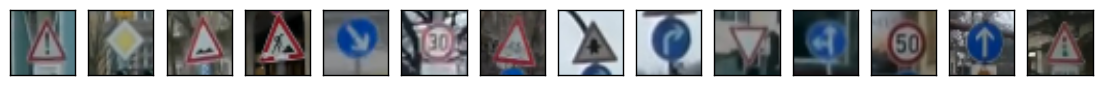

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

n_web_images = 14

# load web images
web_images = np.empty([n_web_images, cols, rows, 3], dtype='B')
for i in range(n_web_images):
    raw_image = mpimg.imread('webimages/sign{}.jpg'.format(i+1))
    web_images[i,:,:,:] = cv2.resize(raw_image, (cols,rows))
    
# print web images    
fig = plt.figure(figsize=(17,1))
for i in range(n_web_images):
    plt.subplot(1, 17, i+1)
    fig = plt.imshow(web_images[i,:,:,:])
    remove_axes(fig)    

### Predict the Sign Type for Each Image

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# labels of web images
y_web = np.array([18,12,22,25,38,1,29,11,33,13,37,2,35,26])

# normalize web images
web_images_norm = np.zeros_like(web_images)
for i in range(0,web_images.shape[0]):
    web_images_norm[i,:,:,:] = contrast_normalization(adaptive_equalize_hist(equalize_hist(imadjust(web_images[i,:,:,:]))))

# predict labels of web images
with tf.Session() as sess:
    saver.restore(sess, './models/traffic_sign_model_{}'.format(best_iter)) 
    predictions_soft = sess.run(logits, feed_dict={x: web_images_norm})
    predictions_hard = [np.argmax(x) for x in predictions_soft]
    for prediction in predictions_hard:
        print(names.iat[prediction,1])

INFO:tensorflow:Restoring parameters from ./models/traffic_sign_model_28
General caution
Priority road
Bumpy road
Road work
Keep right
Speed limit (30km/h)
Bicycles crossing
Right-of-way at the next intersection
Turn right ahead
Yield
Go straight or left
Speed limit (50km/h)
Ahead only
Traffic signals


### Analyze Performance

In [23]:
### Calculate the accuracy for web images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, './models/traffic_sign_model_{}'.format(best_iter))  
    web_accuracy = evaluate(web_images_norm, y_web)  
    print("Accuracy over {} images from the web is {}".format(n_web_images,web_accuracy))
    print("{} out of {} images are classified correctly".format(int(round(n_web_images*web_accuracy)),n_web_images))

INFO:tensorflow:Restoring parameters from ./models/traffic_sign_model_28
Accuracy over 14 images from the web is 1.0
14 out of 14 images are classified correctly


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

  Image     Label                         Top 5 predictions and their softmax probabilities


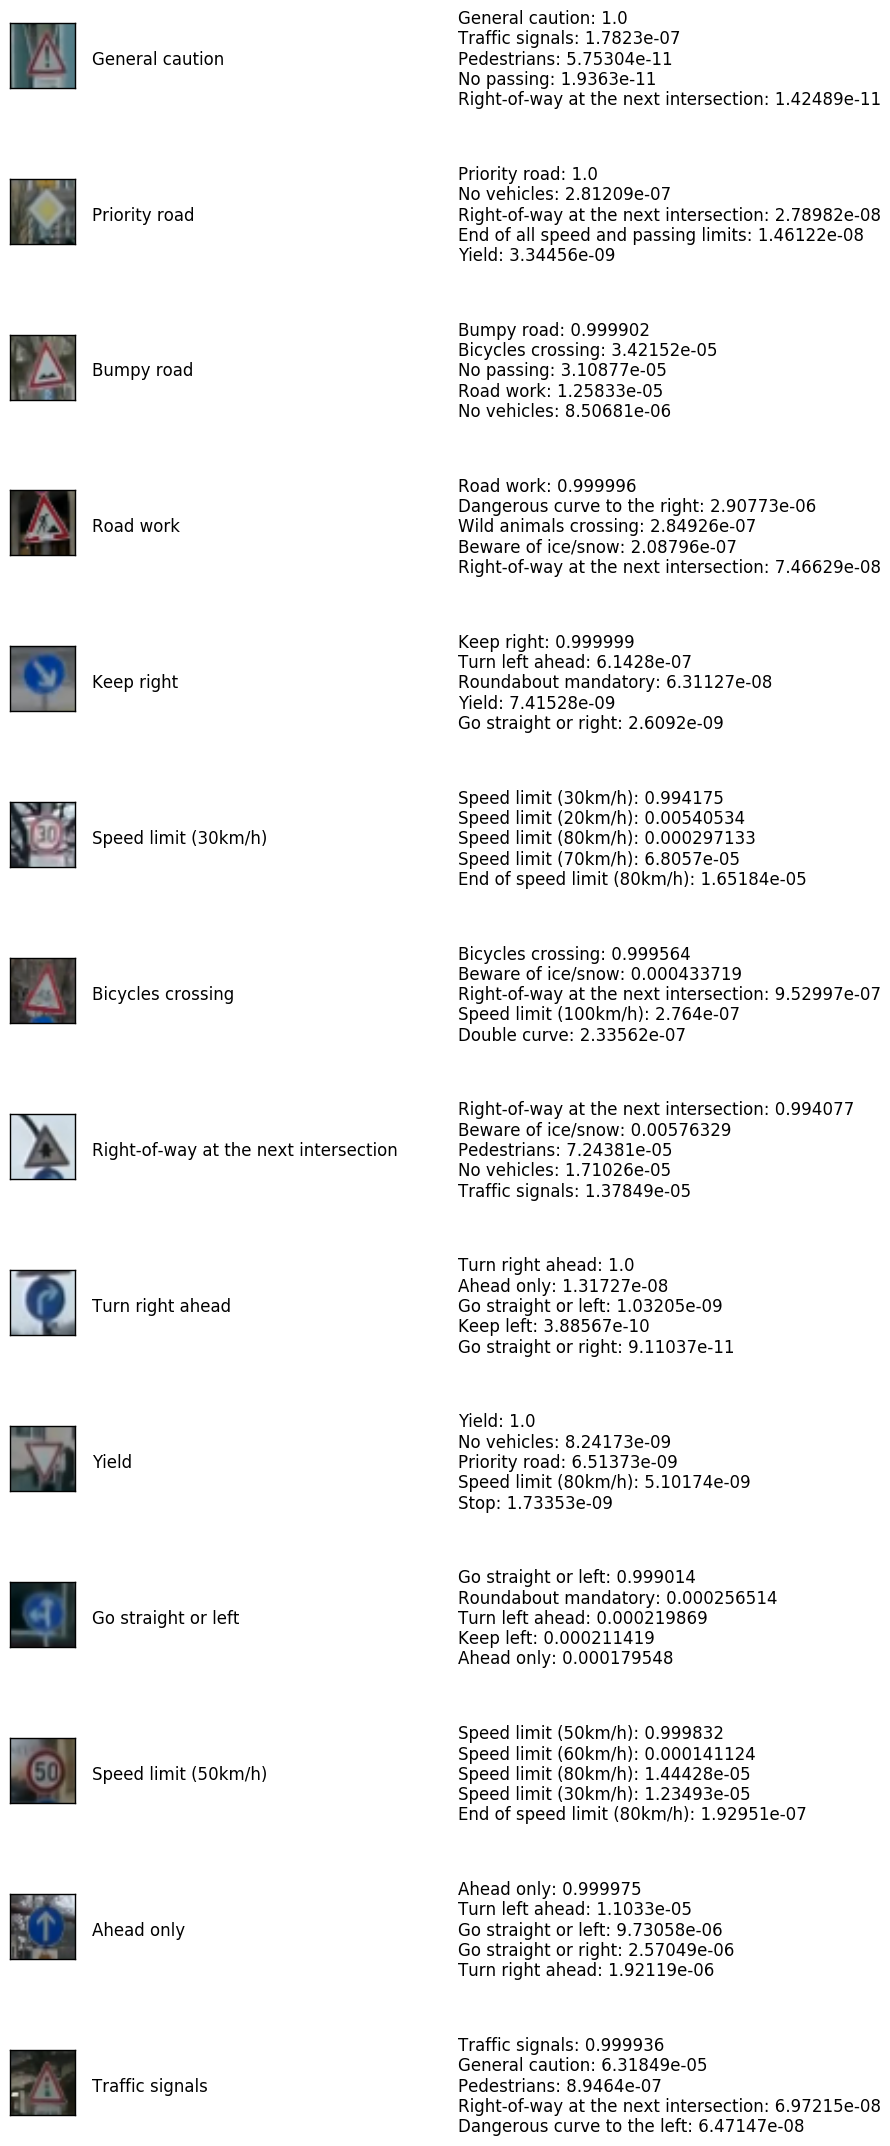

In [24]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    softmax_predictions = tf.nn.softmax(tf.constant(predictions_soft))
    top_predictions = sess.run(tf.nn.top_k(softmax_predictions, k=5)) 

print("  Image     Label                         Top 5 predictions and their softmax probabilities")
fig = plt.figure(figsize=(1,n_web_images*2))
for i in range(n_web_images):
    plt.subplot(n_web_images*2, 1, (i+1)*2-1)
    fig = plt.imshow(web_images[i,:,:,:])
    remove_axes(fig) 
    plt.text(40, 20, names.iat[y_web[i],1], fontsize=12)
    top_predictions_names = names.iloc[top_predictions.indices[i],1]
    for j in range(5):
        plt.text(220,10*(j), top_predictions_names.iat[j] + ": " + str(top_predictions.values[i][j]), fontsize=12)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [25]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry
    
def outputFeatureMap(orig_images, images_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    
    n_images = orig_images.shape[0]
    plt.figure(plt_num, figsize=(15,8*n_images))
    
    for i in range(n_images):
        image = np.empty([1, images_input.shape[1], images_input.shape[2], 3], dtype='B')
        image[0,:,:,:] = images_input[i,:,:,:]
        activation = tf_activation.eval(session=sess,feed_dict={x : image})
        featuremaps = activation.shape[3]
    
        plt.subplot(n_images*(1+featuremaps/8),8,i*(1+featuremaps/8)*8+1)
        fig = plt.imshow(orig_images[i,:,:,:])
        plt.title("Original Image")
        remove_axes(fig)
        
        plt.subplot(n_images*(1+featuremaps/8),8,i*(1+featuremaps/8)*8+2)
        fig = plt.imshow(images_input[i,:,:,:])
        plt.title("Input Image")
        remove_axes(fig)
    
        for featuremap in range(featuremaps):
            plt.subplot(n_images*(1+featuremaps/8),8,i*(1+featuremaps/8)*8+8+featuremap+1) # sets the number of feature maps to show on each row and column
        
            plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
            if activation_min != -1 & activation_max != -1:
                fig = plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, vmax=activation_max, cmap="gray")
            elif activation_max != -1:
                fig = plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
            elif activation_min !=-1:
                fig = plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
            else:
                fig = plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            remove_axes(fig)

visualize activations of conv1 layer of the first 3 web images

INFO:tensorflow:Restoring parameters from ./models/traffic_sign_model_28


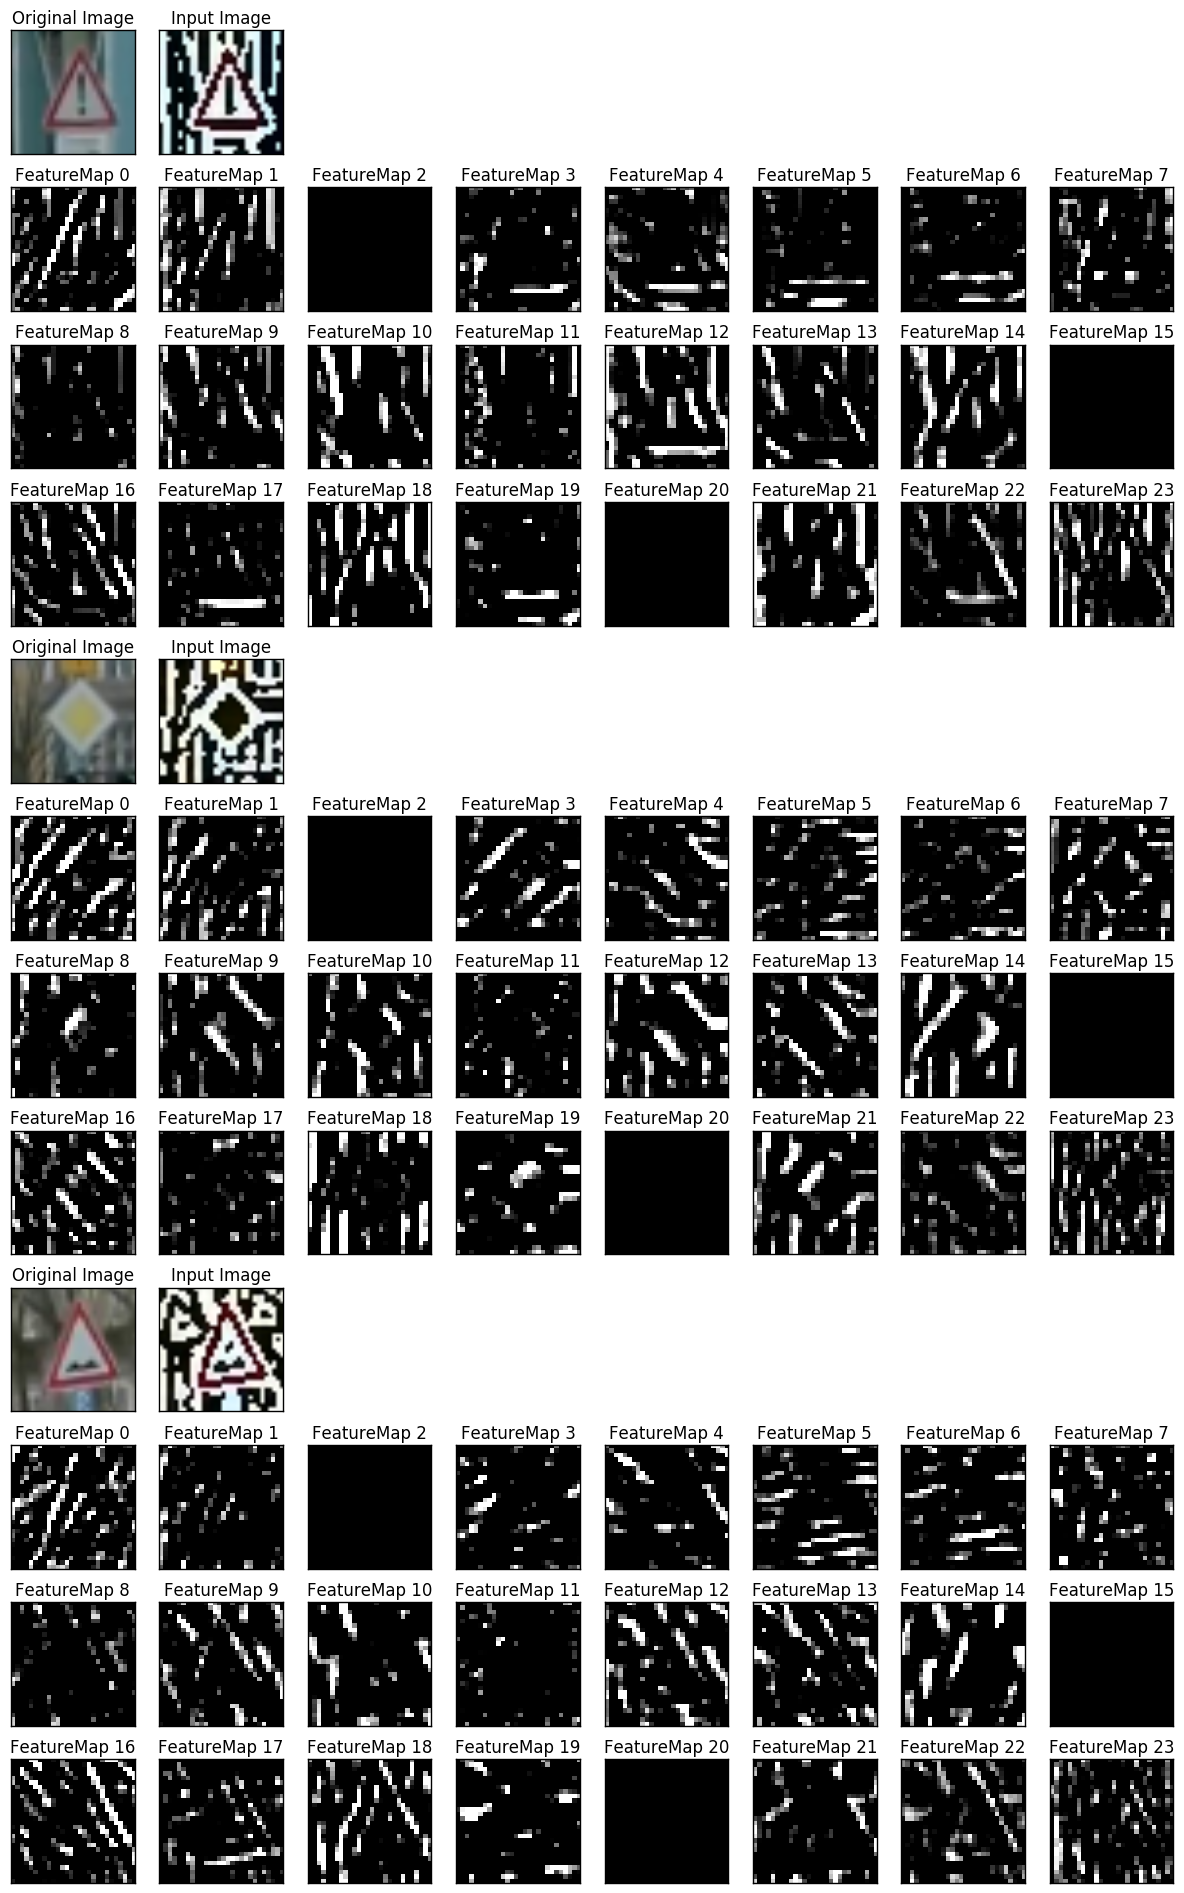

In [26]:
with tf.Session() as sess:
    saver.restore(sess, './models/traffic_sign_model_{}'.format(best_iter))  
    outputFeatureMap(web_images[0:3,:,:,:], web_images_norm[0:3,:,:,:], conv1, activation_min=0, activation_max=50)